# Statistical Problems - Step 1

## Description of data

Our data set with titanic is 891 rows long.  The categories are as follows: (pulled from kaggle.com)

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [24]:
import numpy as np
import os
import pandas as pd

titanic_data = pd.read_csv('train.csv')
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Averages

In [19]:
Ages = np.mean(titanic_data.Age)
print('Average age of all passengers with data is {}'.format(Ages))

Average age of all passengers with data is 29.69911764705882


In [11]:
survivors = titanic_data[titanic_data.Survived == 1]

In [13]:
srv_ages = np.mean(survivors.Age)
print('Average survivor age is {}'.format(srv_ages))

Average survivor age is 28.343689655172415


In [16]:
first_dead = titanic_data[(titanic_data.Survived == 0) & (titanic_data.Pclass ==1)]
first_dead_ages = np.mean(first_dead.Age)
print('Average first class passenger who died age is {}'.format(first_dead_ages))

Average first class passenger who died age is 43.6953125


In [18]:
live_males = titanic_data[(titanic_data.Survived==1) & (titanic_data.Age>30) & (titanic_data.Sex=='male') & (titanic_data.Embarked!= 'Q')]
live_males_ave = np.mean(live_males.Age)
print('Average age of male not dead over 35 not from Queenstown is {}'.format(live_males_ave))

Average age of male not dead over 35 not from Queenstown is 41.48780487804878


## Most of each category

In [23]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

As seen above third class contained the most passegners.

In [20]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As seen above the most common is Southamptom.

In [26]:
survivors['SibSp'].value_counts()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

As seen above the survivors had 0 sibliings or spouses onboards

## Standard Deviations on ticket price

In [32]:
fare_mean = np.mean(titanic_data.Fare)
fare_mean

32.2042079685746

In [31]:
fare_median = np.median(titanic_data.Fare)
fare_median

14.4542

In [34]:
std_all = np.std(titanic_data.Fare)
std_all

49.66553444477411

The median is within one standard dev of the mean.

## 90th vs. 5th percentile

In [36]:
p90, p5 = np.percentile(titanic_data.Fare, [90,5])
diff = p90 - p5
print('The difference between the 90th and 5th percentile in cost is {}'.format(diff))

The difference between the 90th and 5th percentile in cost is 70.7333


In [39]:
p90

77.958299999999994

In [45]:
class_90 = titanic_data[titanic_data.Fare == p90].Pclass
class_90

275    1
627    1
765    1
Name: Pclass, dtype: int64

Tickets at the cost of the 90th percentile are first class passengers.

In [46]:
class_5 = titanic_data[titanic_data.Fare == p5].Pclass
class_5

19     3
26     3
203    3
244    3
354    3
522    3
553    3
598    3
661    3
693    3
773    3
875    3
Name: Pclass, dtype: int64

Tickets at the cost of the 5th percentile are third class passengers

## Highest Average Price per port

In [48]:
S_ave = np.mean(titanic_data.Fare[titanic_data.Embarked=='S'])
S_ave

27.07981180124218

In [49]:
Q_ave = np.mean(titanic_data.Fare[titanic_data.Embarked=='Q'])
Q_ave

13.276029870129872

In [50]:
C_ave = np.mean(titanic_data.Fare[titanic_data.Embarked=='C'])
C_ave

59.95414404761905

Cherbourg is the port with the highest price average.

## Port passengers from the most similar passenger class

In [61]:
S_class_ave = titanic_data[titanic_data.Embarked=='S'].Pclass
import scipy.stats as sp
S_class_ave = sp.mode(S_class_ave)
S_class_ave

ModeResult(mode=array([3]), count=array([353]))

In [62]:
q_class_ave = titanic_data[titanic_data.Embarked=='Q'].Pclass
q_class_ave = sp.mode(q_class_ave)
q_class_ave

ModeResult(mode=array([3]), count=array([72]))

In [63]:
c_class_ave = titanic_data[titanic_data.Embarked=='C'].Pclass
c_class_ave = sp.mode(c_class_ave)
c_class_ave

ModeResult(mode=array([1]), count=array([85]))

Southhamton has the most passangers from the same class which is third at a count of 353.

## How many male survivors in 1st class paid lower then the median

In [66]:
survivors[(survivors.Fare<fare_median)&(survivors.Pclass==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Zero male first clas survivors paid less the the median.

## How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?

In [70]:
surv_fam = np.mean(survivors[(survivors.SibSp>0)|(survivors.Parch>0)].Age)
surv_fam

25.526062500000002

In [74]:
dead_fam = np.mean(titanic_data[(titanic_data.Survived==0) & (titanic_data.SibSp==0) & (titanic_data.Parch==0)].Age)
dead_fam

32.41423357664234

In [75]:
dead_fam - surv_fam

6.888171076642337

The surviving passegners with family were 6.888 years younger then the dead without.   See above for exact number.

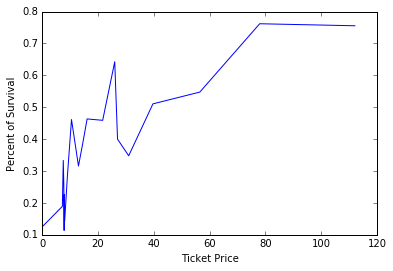

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
quant_list = []
surv_percents = []
for i in range(20):
    i_per, iplus_per = np.percentile(titanic_data.Fare, [i*5, (i+1)*5])
    total = np.sum((titanic_data.Fare > i_per) & (titanic_data.Fare <= iplus_per))
    cut = (titanic_data.Fare > i_per) & (titanic_data.Fare <= iplus_per)
    surv = cut & (titanic_data.Survived==1)
    surv_percents.append(np.sum(surv)/total)
    quant_list.append(i_per)



plt.plot(quant_list, surv_percents)
plt.xlabel("Ticket Price")
plt.ylabel("Percent of Survival")
plt.show()